# Dissection of the life-table QALY calculation

*Original code by Juan Pablo Gallo. Modified by T.W. Alleman in consultation with the BIOMATH research unit headed by prof. Ingmar Nopens.*

Copyright (c) 2022 by BIOMATH, Ghent University. All Rights Reserved.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

## Define the comorbidity profile of the studied population

In [2]:
# Multiindex dataframes are often used troughout the code
# Learn how to acces data using the .loc method
iterables = [pd.IntervalIndex.from_tuples([(0,20),(20,60),(60,120)], closed='left'),['delta_QoL', 'SMR']]
index = pd.MultiIndex.from_product(iterables, names=['age_group', 'metric'])
comorbidity_parameters = pd.DataFrame(index=index, columns=['comorbid_low','comorbid_high'])
comorbidity_parameters.columns.name = 'population'
# SMR = Standardized Mortality Ratio --> Increased risk of dying in any given year
comorbidity_parameters.loc[(slice(None),'SMR'),:] = [0.5, 2]
# delta_QoL --> difference in life-quality from general population
comorbidity_parameters.loc[(slice(None),'delta_QoL'),:] = [0.05, -0.05]

In [3]:
comorbidity_parameters

population          comorbid_low comorbid_high
age_group metric                              
[0, 20)   delta_QoL         0.05         -0.05
          SMR                0.5             2
[20, 60)  delta_QoL         0.05         -0.05
          SMR                0.5             2
[60, 120) delta_QoL         0.05         -0.05
          SMR                0.5             2

### Initialize the QALY_model object

In [4]:
from covid19model.models.QALY import life_table_QALY_model
QALY_model = life_table_QALY_model(comorbidity_parameters)

### Compute and visualize survival functions and life expectancy

I find the SMR abstract, it would be more intuitive to use a difference in life expactancy. The question is how these two properties can be converted. 

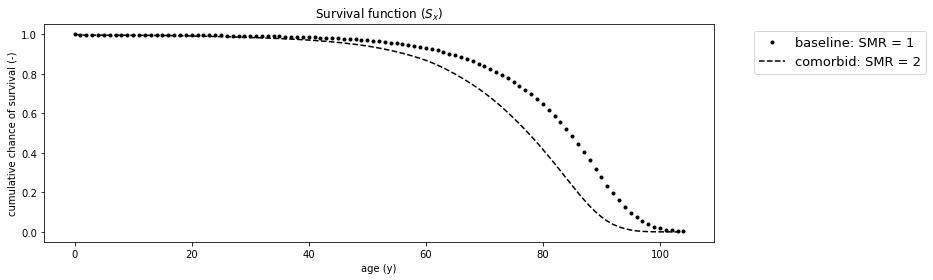

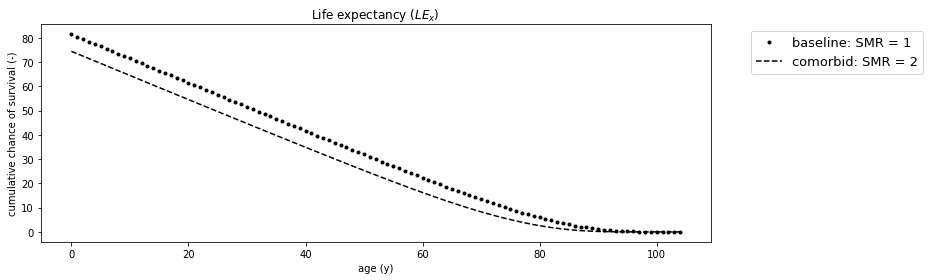

In [5]:
fig,ax = plt.subplots(figsize=(12,4))
SMR_comorbid=2
ax.set_title('Survival function ($S_x$)')
ax.set_ylabel('cumulative chance of survival (-)')
ax.set_xlabel('age (y)')
ax.plot(QALY_model.survival_function(SMR=1),'.',color='black')
ax.plot(QALY_model.survival_function(SMR=SMR_comorbid),'--',color='black')
ax.legend(['baseline: SMR = 1', 'comorbid: SMR = '+ str(SMR_comorbid)], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)
ax.grid(False)
plt.show()
plt.close()

fig,ax = plt.subplots(figsize=(12,4))
ax.set_title('Life expectancy ($LE_x$)')
ax.set_ylabel('cumulative chance of survival (-)')
ax.set_xlabel('age (y)')
ax.plot(QALY_model.life_expectancy(SMR=1),'.',color='black')
ax.plot(QALY_model.life_expectancy(SMR=SMR_comorbid),'--',color='black')
ax.legend(['baseline: SMR = 1', 'comorbid: SMR = '+ str(SMR_comorbid)], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)
ax.grid(False)
plt.show()
plt.close()

### Compute and visualize QALEs en QALYs of the comorbid population

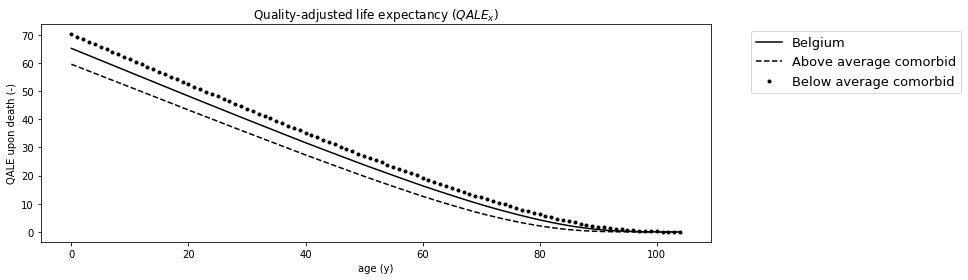

In [6]:
fig,ax = plt.subplots(figsize=(12,4))
SMR_method = 'convergent'
# No comorbidity
ax.plot(QALY_model.compute_QALE_x(population='BE', SMR_method=SMR_method), color='black')
# Comorbidity
ax.plot(QALY_model.compute_QALE_x(population='comorbid_high', SMR_method=SMR_method), '--',color='black')
# Comorbidity
ax.plot(QALY_model.compute_QALE_x(population='comorbid_low', SMR_method=SMR_method), '.',color='black')
ax.set_xlabel('age (y)')
ax.set_ylabel('QALE upon death (-)')
ax.legend(['Belgium', 'Above average comorbid','Below average comorbid'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)
ax.set_title('Quality-adjusted life expectancy ($QALE_x$)')
ax.grid(False)
plt.show()

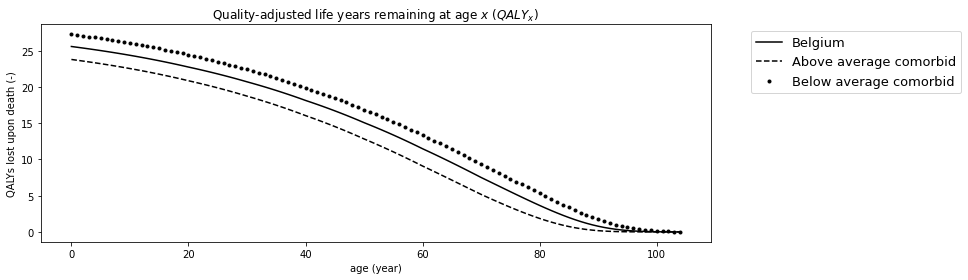

In [7]:
fig,ax = plt.subplots(figsize=(12,4))
SMR_method = 'convergent'
r=0.03
# No comorbidity
ax.plot(QALY_model.compute_QALY_x(population='BE', SMR_method=SMR_method,r=r), color='black')
# Comorbidity
ax.plot(QALY_model.compute_QALY_x(population='comorbid_high', SMR_method=SMR_method,r=r), '--',color='black')
# Comorbidity
ax.plot(QALY_model.compute_QALY_x(population='comorbid_low', SMR_method=SMR_method,r=r), '.',color='black')
ax.set_xlabel('age (year)')
ax.set_ylabel('QALYs lost upon death (-)')
ax.legend(['Belgium', 'Above average comorbid','Below average comorbid'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)
ax.set_title('Quality-adjusted life years remaining at age $x$ ($QALY_x$)')
ax.grid(False)
plt.show()

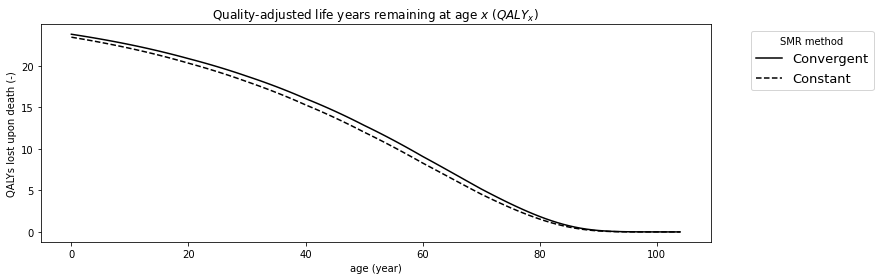

In [8]:
fig,ax = plt.subplots(figsize=(12,4))
r=0.03
# Convergent SMR method
ax.plot(QALY_model.compute_QALY_x(population='comorbid_high', SMR_method='convergent',r=r), color='black')
# Constant SMR method
ax.plot(QALY_model.compute_QALY_x(population='comorbid_high', SMR_method='constant',r=r), '--',color='black')
ax.set_xlabel('age (year)')
ax.set_ylabel('QALYs lost upon death (-)')
ax.legend(['Convergent', 'Constant'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13, title='SMR method')
ax.set_title('Quality-adjusted life years remaining at age $x$ ($QALY_x$)')
ax.grid(False)
plt.show()